# 워드 클라우드 시각화

## 1. 데이터 가져오기

In [1]:
# 폴더 없으면 만들기
import os

folder_path = "./datas_5"  # 만들고 싶은 폴더 경로

if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"'{folder_path}' 폴더를 성공적으로 만들었습니다.")
else:
    print(f"'{folder_path}' 폴더가 이미 존재합니다.")

'./datas_5' 폴더가 이미 존재합니다.


In [2]:
# proverb.txt 파일 생성
contents=""" 작은 일에 성실한 사람은 큰일에도 성실하고,
작은 일에 정직하지 못한 사람은 큰일에도 정직하지 못하다.
변함없이 서로 사랑하는 이가 친구이며
위급할 때 서로 돕는 이가 형제다.
"""
file=open("./datas_5/proverb.txt", 'w') #mode w
file.write(contents)
file.close()

In [3]:
# fruits.txt 파일 생성
fruits=["apple","apple","apple","banana","banana","orange","mango","orange","orange","orange"]
index=len(fruits)
file=open("./datas_5/fruits.txt",'a')
for i in range(len(fruits)):
  if i < (index-1):
    file.write(fruits[i]+'\t')
  else:
    file.write(fruits[i]+'\n')
file.close()

## 지정한 폴더의 파일 모두 읽어오기

In [4]:
import os
import glob
f1=[]
# print(glob.glob('./datas_4/*.txt'))
for file in glob.glob('*.txt'):
  with open(file, 'r', newline='') as filereader:
    for row in filereader:
      contents=row.split()
      for i in contents:
        contents=i.strip('.').strip(',').strip('')
        f1.append(contents)
f1[:20]

['apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'orange',
 'mango',
 'orange',
 'orange',
 'orange']

In [5]:
import os
import glob

f1=[]
for file in glob.glob('./datas_4/*.txt'):
  with open(file, 'r', newline='') as filereader:
    for row in filereader:
      contents=row.split()
      for i in contents:
        contents=i.strip('.').strip(',').strip('').strip('를').strip('을').strip("''")
        contents=contents.strip('합니다').strip('하세요')
        contents=contents.strip('에')
        f1.append(contents)
f1

['apple',
 'apple',
 'apple',
 'banana',
 'banana',
 'orange',
 'mango',
 'orange',
 'orange',
 'orange',
 '작은',
 '일',
 '성실한',
 '사람은',
 '큰일에도',
 '성실하고',
 '작은',
 '일',
 '정직하지',
 '못한',
 '사람은',
 '큰일에도',
 '정직하지',
 '못',
 '변함없이',
 '서로',
 '사랑하는',
 '이가',
 '친구이며',
 '위급할',
 '때',
 '서로',
 '돕는',
 '이가',
 '형제',
 '작은',
 '일',
 '성실한',
 '사람은',
 '큰일에도',
 '성실하고',
 '작은',
 '일',
 '정직하지',
 '못한',
 '사람은',
 '큰일에도',
 '정직하지',
 '못',
 '변함없이',
 '서로',
 '사랑하는',
 '이가',
 '친구이며',
 '위급할',
 '때',
 '서로',
 '돕는',
 '이가',
 '형제']

## 2. 단어의 빈도수 구하기

In [6]:
from collections import Counter
f1
word_counts=Counter(f1)
dict(word_counts)
# wc = word_counts.items()
# 빈도수를 기준으로 내림차순 정렬
wc=sorted(word_counts.items(),key=lambda count:count[1], reverse=True)
wc

[('orange', 4),
 ('작은', 4),
 ('일', 4),
 ('사람은', 4),
 ('큰일에도', 4),
 ('정직하지', 4),
 ('서로', 4),
 ('이가', 4),
 ('apple', 3),
 ('banana', 2),
 ('성실한', 2),
 ('성실하고', 2),
 ('못한', 2),
 ('못', 2),
 ('변함없이', 2),
 ('사랑하는', 2),
 ('친구이며', 2),
 ('위급할', 2),
 ('때', 2),
 ('돕는', 2),
 ('형제', 2),
 ('mango', 1)]

In [7]:
import pandas as pd
wcdf=pd.DataFrame(wc)
wcdf.columns=['word', 'freq']
wcdf.head()

,word,freq
0,orange,4
1,작은,4
2,일,4
3,사람은,4
4,큰일에도,4


In [8]:
# word 컬럼을 인덱스로
wcdf1=wcdf.set_index('word')
wcdf1.head()

,freq
word,
orange,4
작은,4
일,4
사람은,4
큰일에도,4


## 3. 워드 클라우드 구현하기

In [9]:
# 필요한 라이브러리 설치
# !pip install wordcloud  # 워드클라우드
# !pip install konlpy     # 자연어 처리 라이브러리

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 나눔바른고딕 사용
fontpath='./fonts/NanumGothic.ttf'

## 한글이 제대로 표시되지 않는다면 
함께 첨부된 NanumGothic.ttf 파일에서 마우스 오른쪽 단추 [설치] 메뉴를 클릭하여 글꼴을 설치한후 실행합니다.

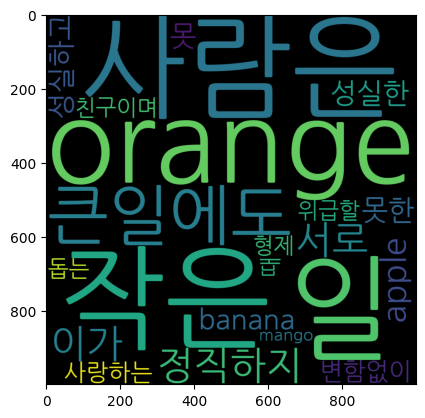

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_freq=wcdf1['freq'].to_dict()
wordcloud=WordCloud(font_path='./NanumGothic.ttf', 
                    width=1000, 
                    height=1000).generate_from_frequencies(word_freq)
plt.imshow(wordcloud)
plt.show()

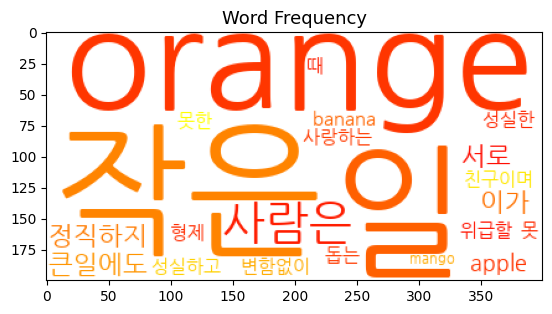

In [14]:
wordcloud=WordCloud(font_path='fonts/NanumGothic.ttf', 
                    background_color='white', 
                    colormap='autumn').generate_from_frequencies(word_freq)
plt.imshow(wordcloud)
plt.title('Word Frequency', size=13) # 제목 지정
plt.show()

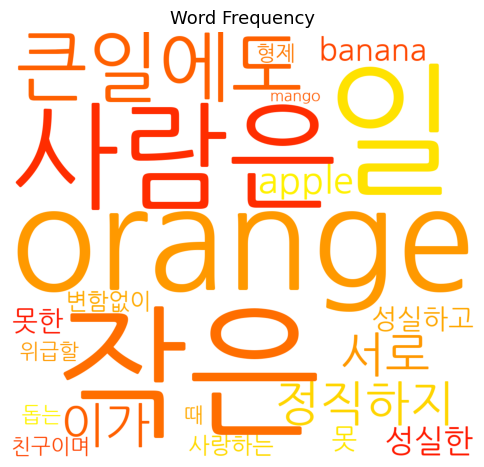

In [15]:
from PIL import Image
import numpy as np
# 이미지 파일 읽어오기 및 RGB로 변환
im = Image.open('images/heart.png').convert("RGBA")
mask_arr = np.array(im)
mask_arr=np.array(im) # 픽셀 값 배열 형태 변환
wordcloud=WordCloud(font_path='fonts/NanumGothic.ttf', 
                    background_color='white', 
                    colormap='autumn',
                    width=700,height=700,
                    random_state=43,
                    mask=mask_arr,prefer_horizontal=True).generate_from_frequencies(word_freq)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.title('Word Frequency', size=13)
plt.axis('off')
plt.show()

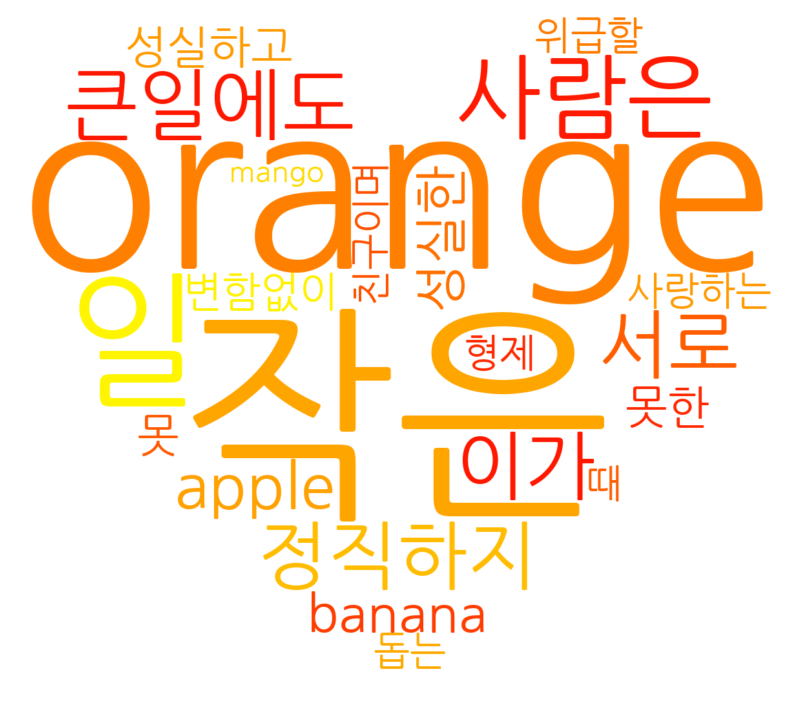

In [16]:
from PIL import Image
# 이미지 형식을 RGBA (Red, Green, Blue, Alpha)로 변환
icon = Image.open('./images/heart.png').convert("RGBA")

# icon 이미지와 동일한 크기의 새로운 RGB 이미지를 생성하고, 배경색을 흰색으로 설정
mask = Image.new("RGB", icon.size, (255,255,255))

# 원본 아이콘 이미지를 마스크 이미지에 붙여넣음
# icon 이미지가 가진 알파 채널(투명도) 정보가 활용되어,
# 투명한 부분은 마스크의 배경색(여기서는 흰색)으로 유지되고,
# 불투명한 부분은 아이콘의 색상으로 채워짐
mask.paste(icon,icon) 
mask = np.array(mask)

wordcloud=WordCloud(font_path='fonts/NanumGothic.ttf',   # 사용할 글꼴 파일의 경로를 지정
                    background_color='white',            # 워드 클라우드의 배경색을 흰색으로 설정
                    colormap='autumn',                   # 워드 클라우드에 표시될 단어들의 색상 맵을 'autumn'으로 설정
                    width=700,                          
                    height=700,
                    # random_state=43,                     # 워드 클라우드의 생성 과정에서 무작위성을 제어하기 위한 시드 값을 설정
                    mask=mask                            # 워드 클라우드의 모양을 mask 배열에 따라 만듬
                   ).generate_from_frequencies(word_freq)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()